In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from astropy.table import Table

In [7]:
from desiutil.sklearn import GaussianMixtureModel

In [3]:
plt.style.use('seaborn-talk')
%matplotlib inline

### Read the heapix information table for DR5.
This file was generated by 

In [22]:
infofile = os.path.join(os.getenv('DESI_ROOT'), 'target', 'catalogs', 'hp-info-dr5-0.17.1.fits')
info = Table.read(infofile)
keep = (info['GALDEPTH_G'] > 0) * (info['GALDEPTH_R'] > 0) * (info['GALDEPTH_Z'] > 0)
info = info[keep]
info

HPXID,HPXAREA,RA,DEC,EBV,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_G_PERCENTILES [5],PSFDEPTH_R_PERCENTILES [5],PSFDEPTH_Z_PERCENTILES [5],GALDEPTH_G_PERCENTILES [5],GALDEPTH_R_PERCENTILES [5],GALDEPTH_Z_PERCENTILES [5],NEXP_G,NEXP_R,NEXP_Z,DENSITY_ALL,DENSITY_ELG,DENSITY_LRG,DENSITY_QSO,DENSITY_LYA,DENSITY_BGS,DENSITY_MWS
int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32
0,0.0524559,45.0,0.149208,0.0884997,24.5756,24.2869,23.3802,24.3435,23.9389,22.9958,24.5756 .. 24.5756,24.2869 .. 24.2869,23.3802 .. 23.3802,24.3435 .. 24.3435,23.9389 .. 23.9389,22.9958 .. 22.9958,4,2,3,5261.57,2363.89,590.973,362.209,0.0,2173.26,0.0
1,0.0524559,45.1758,0.298417,0.106785,24.486,24.2685,23.2003,24.2412,23.9306,22.8072,24.486 .. 24.486,24.2685 .. 24.2685,23.2003 .. 23.2003,24.2412 .. 24.2412,23.9306 .. 23.9306,22.8072 .. 22.8072,3,2,2,4899.36,2440.15,552.846,457.528,0.0,1753.86,0.0
2,0.0524559,44.8242,0.298417,0.0830064,24.6307,24.3332,23.3135,24.3936,23.9783,22.9258,24.6307 .. 24.6307,24.3332 .. 24.3332,23.3135 .. 23.3135,24.3936 .. 24.3936,23.9783 .. 23.9783,22.9258 .. 22.9258,4,2,2,5985.99,2306.7,381.273,171.573,0.0,3259.88,0.0
3,0.0524559,45.0,0.447628,0.0905613,24.5595,24.3113,23.2882,24.318,23.9645,22.8947,24.5595 .. 24.5595,24.3113 .. 24.3113,23.2882 .. 23.2882,24.318 .. 24.318,23.9645 .. 23.9645,22.8947 .. 22.8947,3,2,2,4823.1,2421.08,590.973,247.827,0.0,1715.73,0.0
4,0.0524559,45.3516,0.447628,0.106791,24.344,24.0764,23.1642,24.102,23.7454,22.7739,24.344 .. 24.344,24.0764 .. 24.0764,23.1642 .. 23.1642,24.102 .. 24.102,23.7454 .. 23.7454,22.7739 .. 22.7739,2,1,2,4251.19,2211.38,514.719,209.7,0.0,1429.77,0.0
5,0.0524559,45.5273,0.596842,0.0976935,24.2259,23.9543,23.1532,23.9855,23.6229,22.7657,24.2259 .. 24.2259,23.9543 .. 23.9543,23.1532 .. 23.1532,23.9855 .. 23.9855,23.6229 .. 23.6229,22.7657 .. 22.7657,2,1,2,2573.59,1277.26,381.273,133.446,0.0,934.119,0.0
6,0.0524559,45.1758,0.596842,0.0954995,24.4659,24.22,23.2737,24.225,23.8825,22.8842,24.4659 .. 24.4659,24.22 .. 24.22,23.2737 .. 23.2737,24.225 .. 24.225,23.8825 .. 23.8825,22.8842 .. 22.8842,3,2,2,4098.68,2230.45,438.464,285.955,0.0,1315.39,0.0
7,0.0524559,45.3516,0.74606,0.0932954,24.2841,24.0478,23.2943,24.0309,23.7343,22.9331,24.2841 .. 24.2841,24.0478 .. 24.0478,23.2943 .. 23.2943,24.0309 .. 24.0309,23.7343 .. 23.7343,22.9331 .. 22.9331,2,1,3,4308.38,2039.81,629.1,305.018,0.0,1563.22,0.0
8,0.0524559,44.6484,0.447628,0.0814718,24.6186,24.3453,23.1599,24.3744,23.9866,22.7684,24.6186 .. 24.6186,24.3453 .. 24.3453,23.1599 .. 23.1599,24.3744 .. 24.3744,23.9866 .. 23.9866,22.7684 .. 22.7684,3,2,2,5032.8,2344.83,228.764,266.891,0.0,2363.89,0.0


#### Only use healpixels containing three or more exposures per band.

In [16]:
minexp = 3

In [23]:
these = (info['NEXP_G'] >= minexp) * (info['NEXP_R'] >= minexp) * (info['NEXP_Z'] >= minexp)
print('There are {} / {} healpixels with >={} exposures in grz.'.format(np.sum(these), len(info), minexp))

There are 42792 / 137424 healpixels with >=3 exposures in grz.


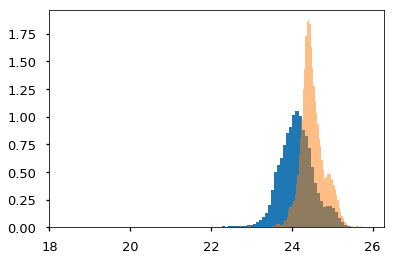

In [24]:
fig, ax = plt.subplots()
_ = ax.hist(info['GALDEPTH_G'], bins=100, normed=True)
_ = ax.hist(info['GALDEPTH_G'][these], bins=100, normed=True, alpha=0.5)
#ax.set_xlim(20, 26)

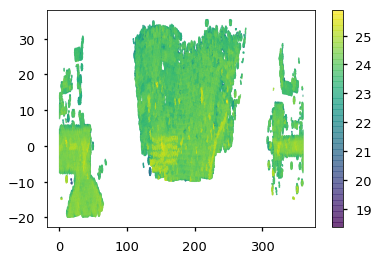

In [35]:
fig, ax = plt.subplots()
ss = ax.scatter(info['RA'], info['DEC'], c=info['GALDEPTH_G'], s=1, alpha=0.5)
cb = plt.colorbar(ss)

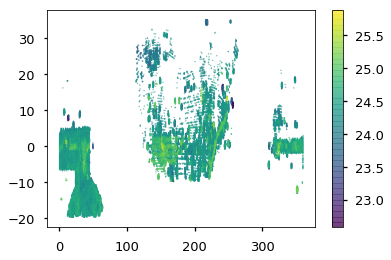

In [36]:
fig, ax = plt.subplots()
ss = ax.scatter(info['RA'][these], info['DEC'][these], c=info['GALDEPTH_G'][these], s=1, alpha=0.5)
cb = plt.colorbar(ss)

(0, 1000)

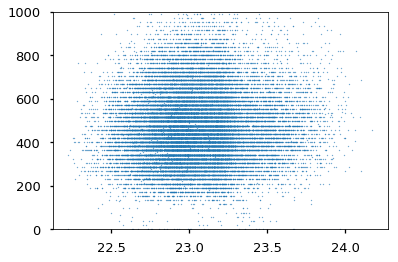

In [44]:
fig, ax = plt.subplots()
ax.scatter(info['GALDEPTH_Z'][these], info['DENSITY_LRG'][these], s=1, alpha=0.5)
ax.set_ylim(0, 1000)